In [1]:
# library including
library(plyr)
library(ggplot2)

In [2]:
#multiplot() for plot multiple plots with ggplot()
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }

  if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [4]:
setwd("C:/Users/Jimny/Desktop/Study/STAT689/Project")
data = read.csv("all_subjects_ee.csv",header=TRUE)
head(data)
dim(data)

Subject,Energy_expenditure,date,time,date1,day,count,time_elapsed
1,2.6423931,19260,28380,1,1,1,0
1,0.4922180,19260,28440,1,1,2,1
1,0.4576224,19260,28500,1,1,3,2
1,0.4833457,19260,28560,1,1,4,3
1,1.4533526,19260,28620,1,1,5,4
1,0.4644225,19260,28680,1,1,6,5


[1] 674203      8

Warning message:
"Removed 113 rows containing missing values (geom_path)."Warning message:
"Removed 785 rows containing missing values (geom_point)."

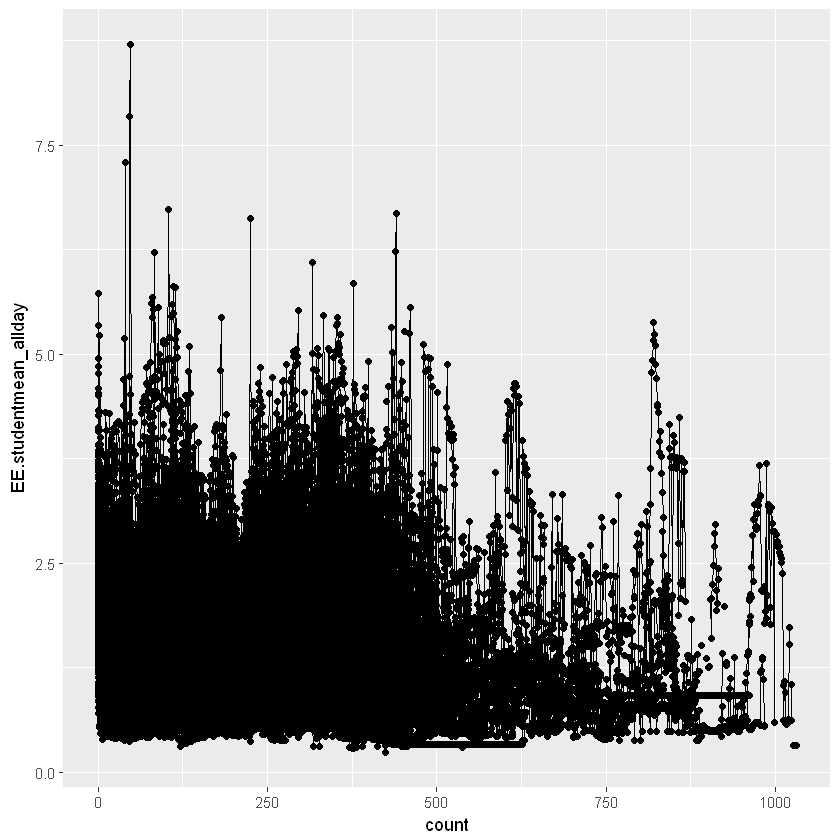

In [6]:
#mean EE of day of each student at each time point(count) excluding the NA values. 

EE.studentmean_allday = ddply(data, .(Subject, count), summarize,  EE.studentmean_allday=mean(Energy_expenditure,na.rm=TRUE))

#EE.daymean = aggregate(data[,2], list(data$Subject), mean)

#convert subject to numeric variable since ggplot() require group to be numeric. 
test = as.data.frame(cbind( as.numeric(EE.studentmean_allday$Subject), as.numeric(EE.studentmean_allday$count),EE.studentmean_allday$EE.studentmean_allday))
names(test) = c("Subject","count", "EE.studentmean_allday" )

ggplot(test, aes(x=count, y=EE.studentmean_allday, group=Subject))+geom_line()+geom_point() #+geom_smooth(alpha=.2, size=1)

count,EE.daymean
1,2.331165
2,1.820801
3,1.694014
4,1.597427
5,1.547188
6,1.485520


Warning message:
"Removed 2 rows containing missing values (geom_point)."

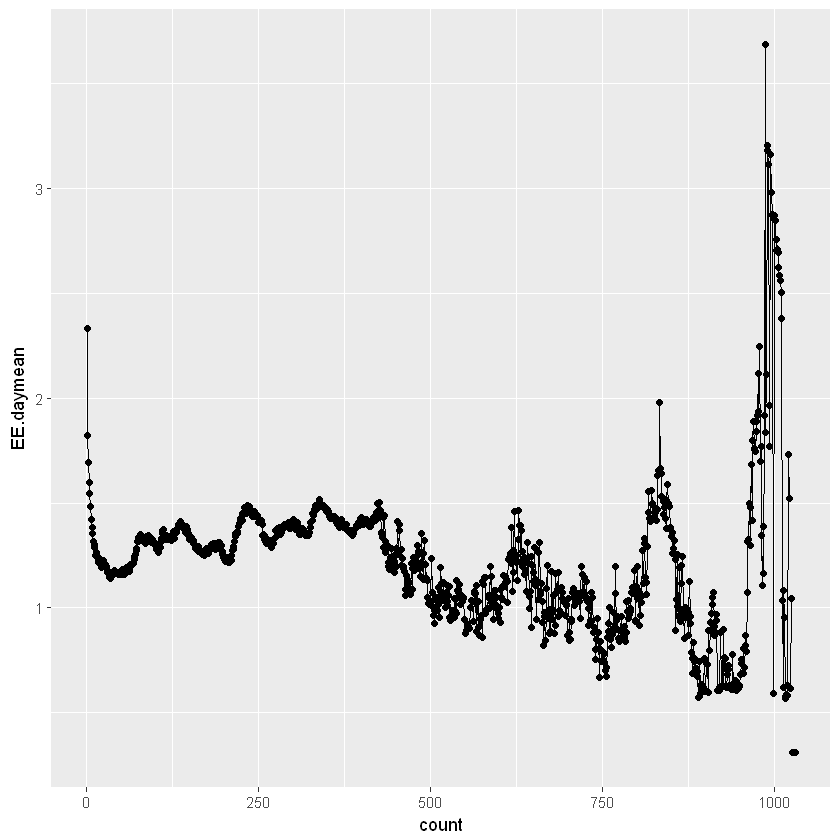

In [7]:
# mean EE of all students of 5 days by each count
EE.allmean = ddply(data, .(count), summarize,  EE.daymean=mean(Energy_expenditure,na.rm=TRUE))
head(EE.allmean)
ggplot(EE.allmean, aes(x=count, y=EE.daymean))+geom_line()+geom_point() #+geom_smooth(alpha=.2, size=1)

In [8]:
# mean EE of all students of each day by each count
EE.allmean_day = ddply(data, .(day,count), summarize,  EE.daymean=mean(Energy_expenditure,na.rm=TRUE))
head(EE.allmean_day)

day,count,EE.daymean
1,1,2.280874
1,2,1.704448
1,3,1.460658
1,4,1.467466
1,5,1.410684
1,6,1.463514


Warning message:
"Removed 233 rows containing missing values (geom_point)."

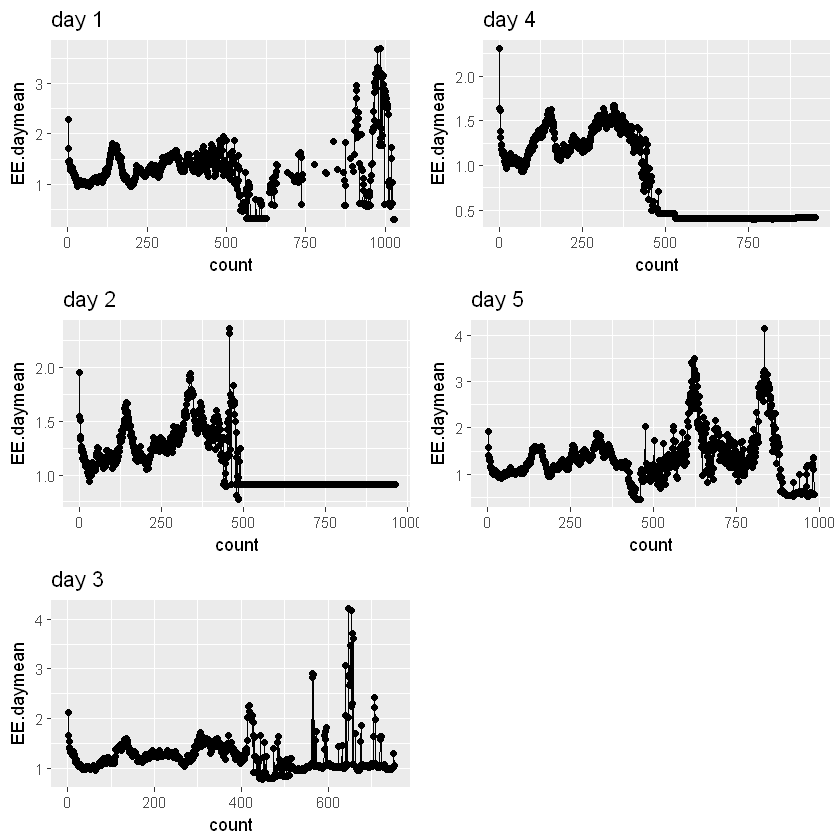

In [10]:
#par(mfrow=c(2, 3))
p1 = ggplot(EE.allmean_day[which(EE.allmean_day$day==1),], aes(x=count, y=EE.daymean))+geom_line()+geom_point()+ggtitle("day 1")
p2 = ggplot(EE.allmean_day[which(EE.allmean_day$day==2),], aes(x=count, y=EE.daymean))+geom_line()+geom_point()+ggtitle("day 2")
p3 = ggplot(EE.allmean_day[which(EE.allmean_day$day==3),], aes(x=count, y=EE.daymean))+geom_line()+geom_point()+ggtitle("day 3")
p4 = ggplot(EE.allmean_day[which(EE.allmean_day$day==4),], aes(x=count, y=EE.daymean))+geom_line()+geom_point()+ggtitle("day 4")
p5 = ggplot(EE.allmean_day[which(EE.allmean_day$day==5),], aes(x=count, y=EE.daymean))+geom_line()+geom_point()+ggtitle("day 5")


multiplot(p1, p2, p3, p4,p5, cols=2)

Subject,day,count,EE.daymean
1,1,1,2.6423931
1,1,2,0.4922180
1,1,3,0.4576224
1,1,4,0.4833457
1,1,5,1.4533526
1,1,6,0.4644225


Warning message:
"Removed 31 rows containing missing values (geom_path)."Warning message:
"Removed 43 rows containing missing values (geom_path)."Warning message:
"Removed 54 rows containing missing values (geom_path)."Warning message:
"Removed 27 rows containing missing values (geom_path)."Warning message:
"Removed 16 rows containing missing values (geom_path)."

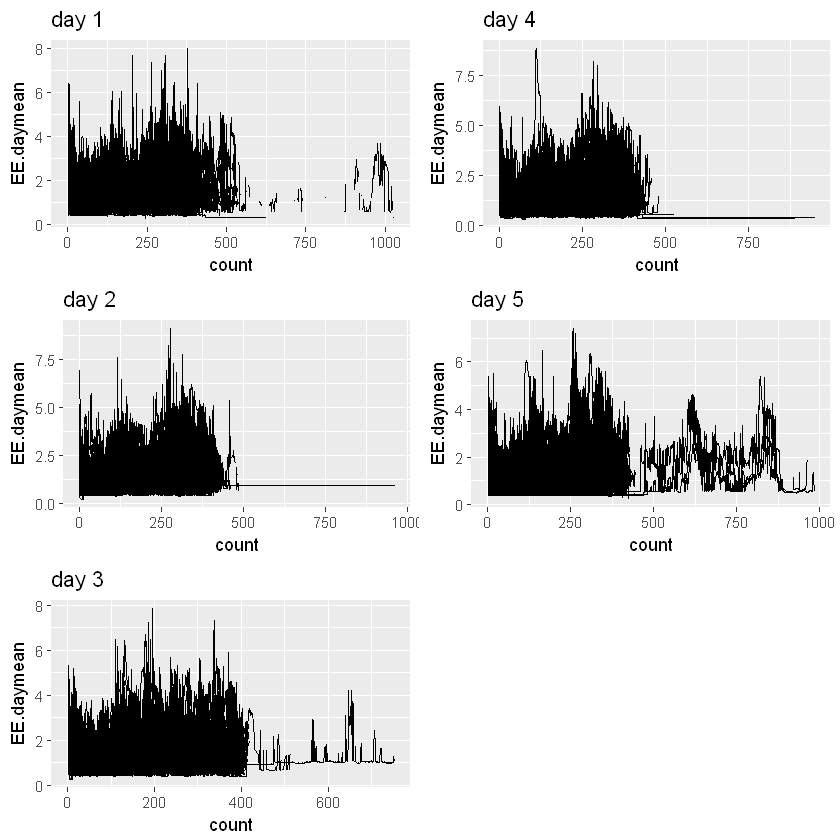

In [11]:
#> `geom_smooth()` using method = 'loess'



#mean EE of each day of each student at each time point(count) excluding the NA values. 

EE.studentmean_eachday = ddply(data, .(Subject, day,count), summarize,  EE.daymean=mean(Energy_expenditure,na.rm=TRUE))
head(EE.studentmean_eachday)

p1 = ggplot(EE.studentmean_eachday[which(EE.studentmean_eachday$day==1),], aes(x=count, y=EE.daymean, group=Subject))+geom_line()+ggtitle("day 1") #+geom_point()
p2 = ggplot(EE.studentmean_eachday[which(EE.studentmean_eachday$day==2),], aes(x=count, y=EE.daymean, group=Subject))+geom_line()+ggtitle("day 2")
p3 = ggplot(EE.studentmean_eachday[which(EE.studentmean_eachday$day==3),], aes(x=count, y=EE.daymean, group=Subject))+geom_line()+ggtitle("day 3")
p4 = ggplot(EE.studentmean_eachday[which(EE.studentmean_eachday$day==4),], aes(x=count, y=EE.daymean, group=Subject))+geom_line()+ggtitle("day 4")
p5 = ggplot(EE.studentmean_eachday[which(EE.studentmean_eachday$day==5),], aes(x=count, y=EE.daymean, group=Subject))+geom_line()+ggtitle("day 5")
multiplot(p1, p2, p3, p4,p5, cols=2)

Warning message:
"Removed 31 rows containing missing values (geom_path)."Warning message:
"Removed 43 rows containing missing values (geom_path)."Warning message:
"Removed 54 rows containing missing values (geom_path)."Warning message:
"Removed 27 rows containing missing values (geom_path)."Warning message:
"Removed 16 rows containing missing values (geom_path)."

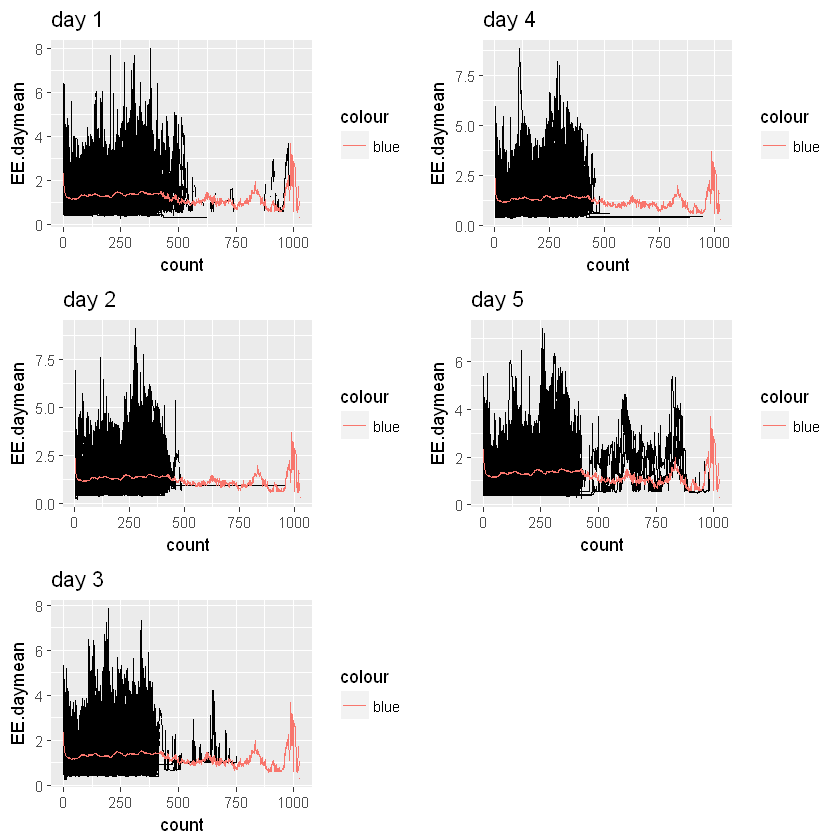

In [12]:
# add mean of all students to the plots above
p1 = ggplot(data=EE.studentmean_eachday[which(EE.studentmean_eachday$day==1),], aes(x=count, y=EE.daymean, group=Subject))+geom_line()+ggtitle("day 1")+
  geom_line(data=EE.allmean, aes(x=count, y=EE.daymean,group=NULL, colour="blue"))
#NOTE: since the first ggplot has "group" in it, the second one will look for "group" too. Set it to be NULL, since we dont have a group factor for the second plot
p2 = ggplot(data=EE.studentmean_eachday[which(EE.studentmean_eachday$day==2),], aes(x=count, y=EE.daymean, group=Subject))+geom_line()+ggtitle("day 2")+
  geom_line(data=EE.allmean, aes(x=count, y=EE.daymean,group=NULL, colour="blue"))
p3 = ggplot(data=EE.studentmean_eachday[which(EE.studentmean_eachday$day==3),], aes(x=count, y=EE.daymean, group=Subject))+geom_line()+ggtitle("day 3")+
  geom_line(data=EE.allmean, aes(x=count, y=EE.daymean,group=NULL, colour="blue"))
p4 = ggplot(data=EE.studentmean_eachday[which(EE.studentmean_eachday$day==4),], aes(x=count, y=EE.daymean, group=Subject))+geom_line()+ggtitle("day 4")+
  geom_line(data=EE.allmean, aes(x=count, y=EE.daymean,group=NULL, colour="blue"))
p5 = ggplot(data=EE.studentmean_eachday[which(EE.studentmean_eachday$day==5),], aes(x=count, y=EE.daymean, group=Subject))+geom_line()+ggtitle("day 5")+
  geom_line(data=EE.allmean, aes(x=count, y=EE.daymean,group=NULL, colour="blue"))
multiplot(p1, p2, p3, p4,p5, cols=2)

